# Import Libraries


In [13]:
# Essentials
import numpy as np
import pandas as pd
import joblib

# Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Classification Metric
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report

# Plotting Data
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Data Conversion Warning
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Data Pre-processing

![](https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/6230e9ee021b250dd3710f8e_61ca4fbcc80819e696ba0ee9_Feature-Engineering-Machine-Learning-Diagram.png)

##### Import Dataset

In [14]:
df = pd.read_csv('cause_of_death_training.csv')

##### Analyze Dataset

In [15]:
display("Rows that contain null values", df.isnull().sum())
print("----------------------")
display("Duplicated Rows", df.duplicated().sum())

display(df.head())
df.shape

'Rows that contain null values'

X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10       175
X11         0
Target      0
dtype: int64

----------------------


'Duplicated Rows'

0

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


(3999, 12)

##### Dataset Processing

In [16]:
print(df.columns.tolist())

# Renaming Columns

df = df.rename(columns={'X1': 'ID', 'X2': 'Gender','X3': 'age', 'X4': 'hypertension','X5': 'heart disease', 'X6': 'Married','X7': 'work_type', 'X8': 'Residence', 'X9': 'AVG_glucose','X10': 'BMI','X11': 'Smoking_status','X12': 'Target'})

df.info()

# distinct_values = df['BMI'].unique()

# print(distinct_values)

df.head()


['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3999 non-null   int64  
 1   Gender          3999 non-null   object 
 2   age             3999 non-null   float64
 3   hypertension    3999 non-null   int64  
 4   heart disease   3999 non-null   int64  
 5   Married         3999 non-null   object 
 6   work_type       3999 non-null   object 
 7   Residence       3999 non-null   object 
 8   AVG_glucose     3999 non-null   float64
 9   BMI             3824 non-null   float64
 10  Smoking_status  3999 non-null   object 
 11  Target          3999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 375.0+ KB


,ID,Gender,age,hypertension,heart disease,Married,work_type,Residence,AVG_glucose,BMI,Smoking_status,Target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
median_bmi = df['BMI'].median()
df.BMI=df.BMI.fillna(median_bmi)
df.info()

df['target']=df.Target

df = df.drop(['Target'], axis=1)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3999 non-null   int64  
 1   Gender          3999 non-null   object 
 2   age             3999 non-null   float64
 3   hypertension    3999 non-null   int64  
 4   heart disease   3999 non-null   int64  
 5   Married         3999 non-null   object 
 6   work_type       3999 non-null   object 
 7   Residence       3999 non-null   object 
 8   AVG_glucose     3999 non-null   float64
 9   BMI             3999 non-null   float64
 10  Smoking_status  3999 non-null   object 
 11  Target          3999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 375.0+ KB


,ID,Gender,age,hypertension,heart disease,Married,work_type,Residence,AVG_glucose,BMI,Smoking_status,target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### Data Visualization

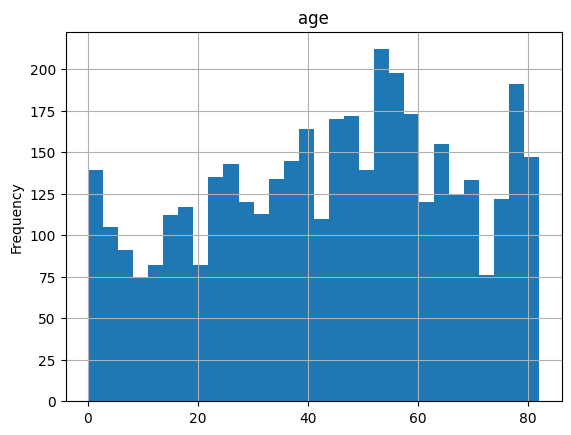

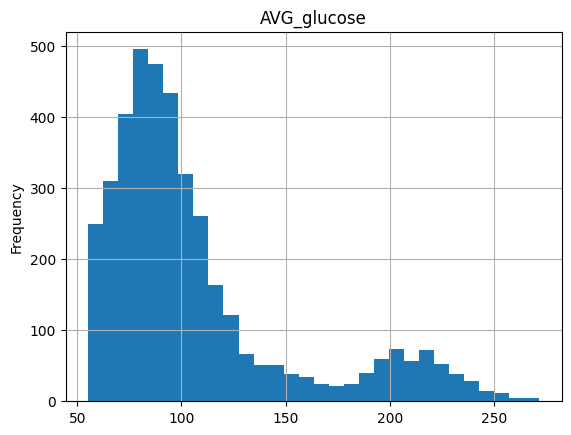

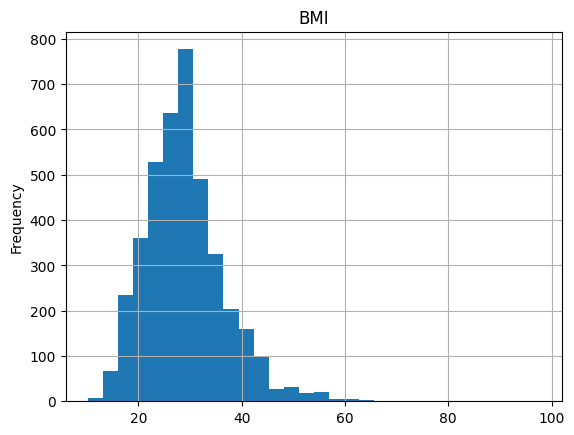

In [18]:
features_num = ['age', 'AVG_glucose','BMI']

for f in features_num:
    df[f].plot(kind='hist', bins=30)
    plt.title(f)
    plt.grid()
    plt.show()

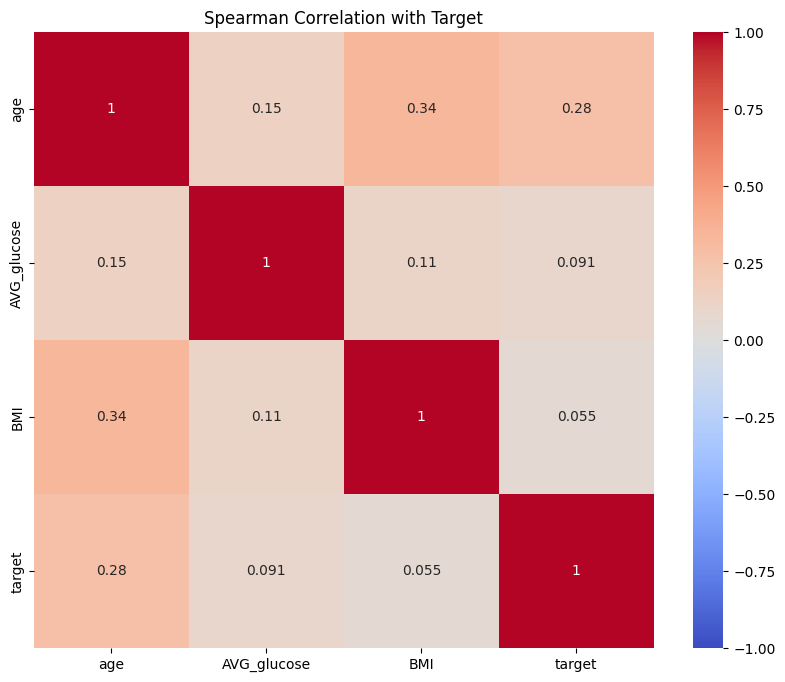

In [19]:
features_with_target = features_num + ['target']

corr_spearman = df[features_with_target].corr(method='spearman')

fig = plt.figure(figsize = (10,8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", vmin=-1, vmax=+1)
plt.title('Spearman Correlation with Target')
plt.show()

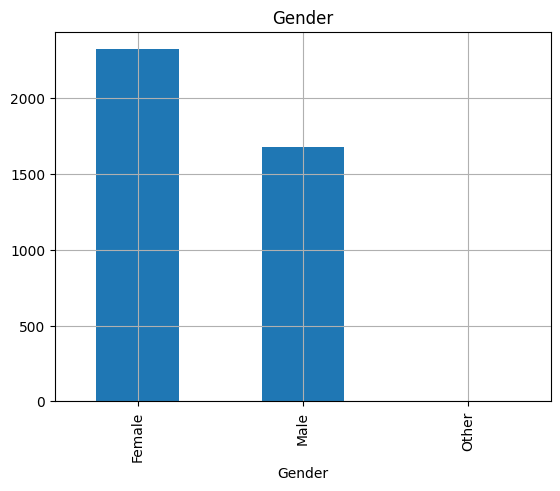

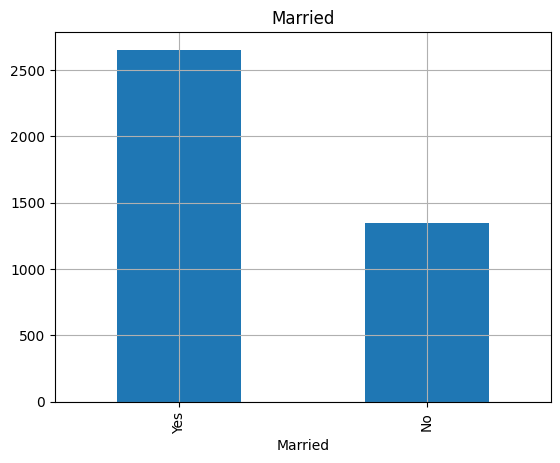

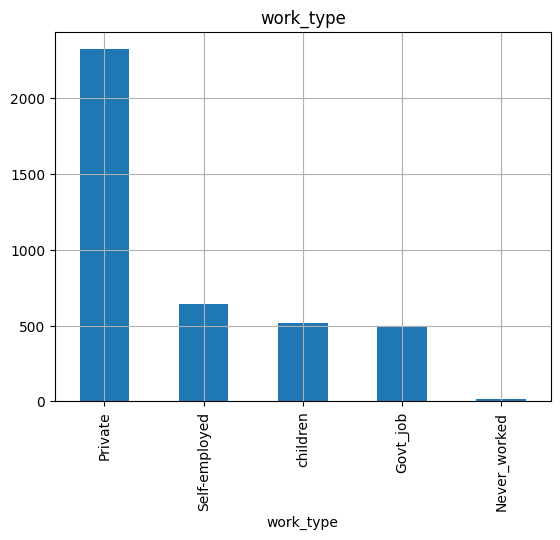

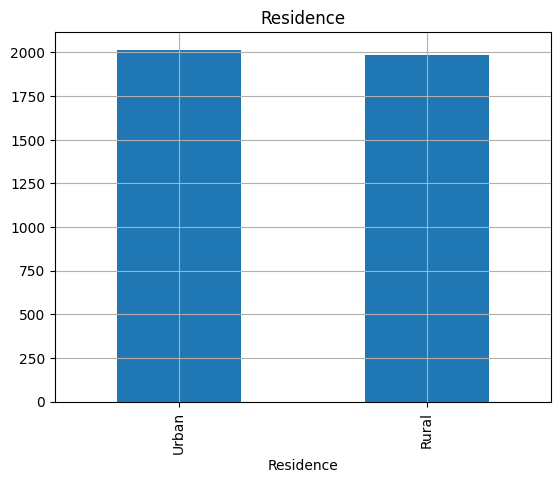

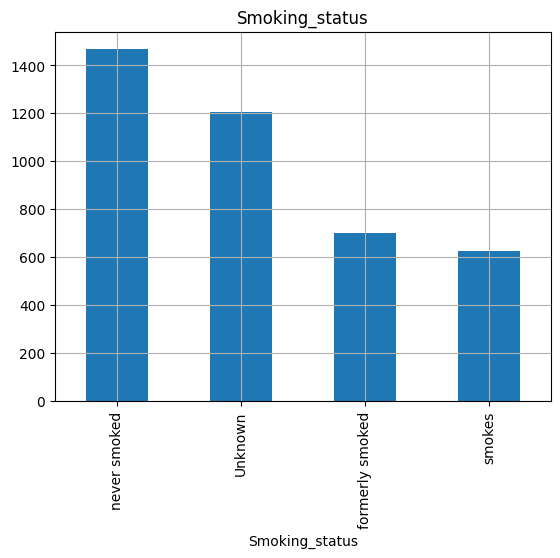

In [20]:
df.columns.tolist()


#features_cat = ['Gender','hypertension','heart disease','Married',
#       'work_type','Residence','Smoking_status']

features_cat = df.select_dtypes(include="object").columns

for f in features_cat:
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

##### Feature Encoding

In [21]:
label_encoder = LabelEncoder()

for column in features_cat :
    df[column] = label_encoder.fit_transform(df[column])

df.head()


,ID,Gender,age,hypertension,heart disease,Married,work_type,Residence,AVG_glucose,BMI,Smoking_status,target
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


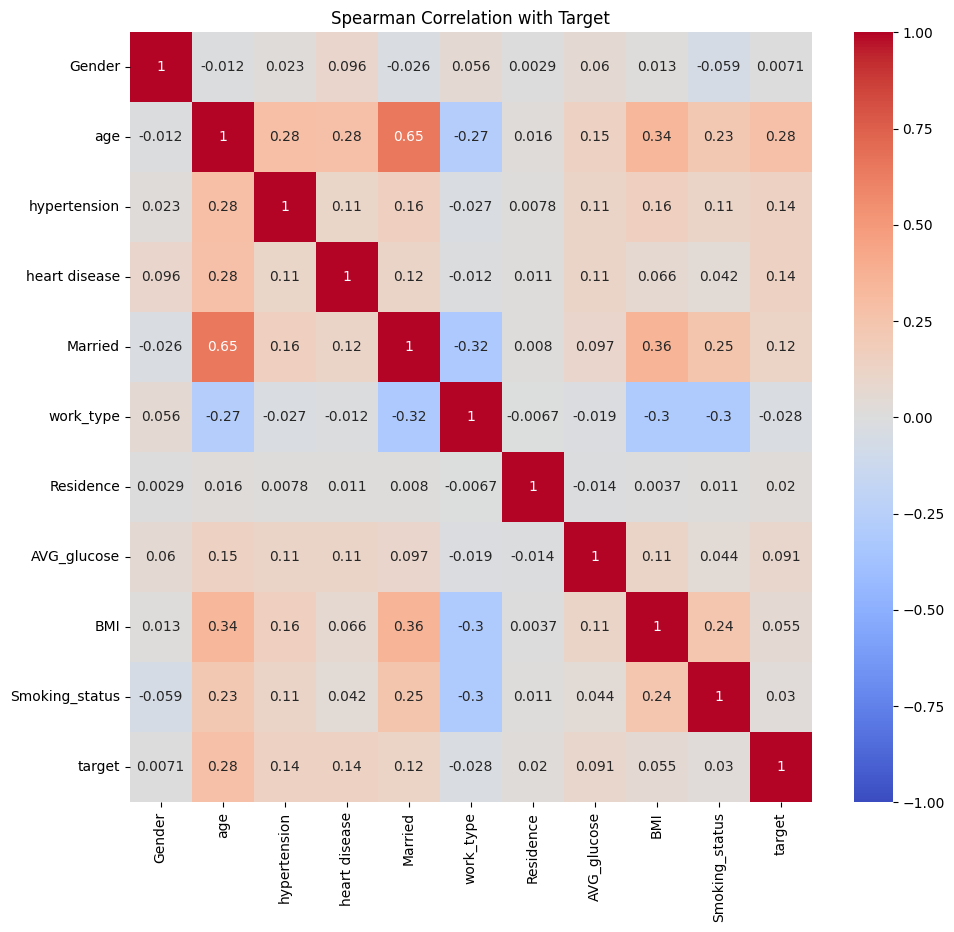

In [22]:
features=['Gender','age','hypertension','heart disease','Married','work_type','Residence', 'AVG_glucose','BMI','Smoking_status']
features_with_target = features + ['target']

# Calculate the Spearman correlation
corr_spearman = df[features_with_target].corr(method='spearman')

# Plot the heatmap
fig = plt.figure(figsize = (11,10))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", vmin=-1, vmax=+1)
plt.title('Spearman Correlation with Target')
plt.show()

##### Data Splitting & Resampling

In [23]:
class_counts = df['target'].value_counts()
print("Number of instances classified as 1:", class_counts[1])
print("Number of instances classified as 0:", class_counts[0])

Number of instances classified as 1: 249
Number of instances classified as 0: 3750


In [24]:
features = ['age',
 'hypertension',
 'heart disease',
 'Married',
 'Residence',
 'AVG_glucose',
 'BMI',
 'Gender',
 'Smoking_status']

label = ['target']

X = df[features]
y = df[label]

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,y)

X.isnull().sum()

X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.25,random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [25]:
LR=LogisticRegression()

LR.fit(X_train,y_train)

y_pred=LR.predict(X_test)

class_report=classification_report(y_test,y_pred)
print(class_report)

auc = roc_auc_score(y_test, y_pred)
display(auc)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       946
           1       0.79      0.81      0.80       929

    accuracy                           0.80      1875
   macro avg       0.80      0.80      0.80      1875
weighted avg       0.80      0.80      0.80      1875



0.798509161001964

# Random Forest

In [26]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RF_pred=RF.predict(X_test)
accuracy_RF=accuracy_score(y_test,RF_pred)

print(classification_report(y_test,RF_pred))

roc_auc_score(y_test, RF_pred)

# # Get feature importance from a tree-based model (e.g., Random Forest)
# feature_importance = RF.feature_importances_

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(feature_importance)), feature_importance)
# plt.yticks(range(len(feature_importance)), range(len(feature_importance)))  # Use indices instead of feature names
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Index')
# plt.title('Random Forest Feature Importance')
# plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
# plt.show()

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       946
           1       0.91      0.94      0.93       929

    accuracy                           0.93      1875
   macro avg       0.93      0.93      0.93      1875
weighted avg       0.93      0.93      0.93      1875



0.9254722734896464

# Support Vector Machines

In [27]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8256
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       946
           1       0.79      0.88      0.83       929

    accuracy                           0.83      1875
   macro avg       0.83      0.83      0.83      1875
weighted avg       0.83      0.83      0.83      1875



# Decision Tree


In [28]:
# Decision Tree Placeholder
DT=DecisionTreeClassifier(max_depth=25 ,random_state=42)

DT.fit(X_train, y_train)

y_pred=DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8821333333333333
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       946
           1       0.86      0.91      0.88       929

    accuracy                           0.88      1875
   macro avg       0.88      0.88      0.88      1875
weighted avg       0.88      0.88      0.88      1875



# Saved Model

##### Logistic Regression

In [29]:
joblib.dump(RF,'RF.joblib')

['RF.joblib']

##### Random Forest

In [30]:
joblib.dump(LR,'LR.joblib')

['LR.joblib']

##### Support Vector Machines

In [31]:
joblib.dump(svm_classifier,'SCV.joblib')

['SCV.joblib']

##### Decision Tree

In [32]:
joblib.dump(DT,'DT.joblib')

['DT.joblib']

#### Predict Model

In [33]:
def preprocess_data(data):
    # Apply the same preprocessing steps as done during training
    # Handle missing values, outliers, feature extraction, encoding, scaling, etc.
    # Ensure consistency with the preprocessing steps used during training
    data = data.rename(columns={'X1': 'ID', 'X2': 'Gender','X3': 'age', 'X4': 'hypertension','X5': 'heart disease', 'X6': 'Married','X7': 'work_type', 'X8': 'Residence', 'X9': 'AVG_glucose','X10': 'BMI','X11': 'Smoking_status','X12': 'Target'})
    median_bmi = data['BMI'].median()
    data.BMI=data.BMI.fillna(median_bmi)
    data.info()

    data['target']=data.Target

    data = data.drop(['Target'], axis=1)
    features_num = ['age', 'AVG_glucose','BMI']
    features_cat = df.select_dtypes(include="object").columns

    preprocessed_data = data
    return preprocessed_data

In [34]:
# Load new data
new_data = pd.read_csv('cause_of_death_training.csv')

# Preprocess new data
preprocessed_new_data = preprocess_data(new_data)

label_encoder = LabelEncoder()
encoded_data = preprocessed_new_data.copy()  # Make a copy to avoid modifying the original DataFrame

# Loop through each column in the DataFrame
for col in encoded_data.columns:
    # Check if the column contains categorical data (dtype='object')
    if encoded_data[col].dtype == 'object':
        # Use LabelEncoder to encode the categorical data
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

columns_to_drop = ['ID', 'work_type', 'target']
encoded_data.drop(columns=columns_to_drop, inplace=True)

display(encoded_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5110 non-null   int64  
 1   Gender          5110 non-null   object 
 2   age             5110 non-null   float64
 3   hypertension    5110 non-null   int64  
 4   heart disease   5110 non-null   int64  
 5   Married         5110 non-null   object 
 6   work_type       5110 non-null   object 
 7   Residence       5110 non-null   object 
 8   AVG_glucose     5110 non-null   float64
 9   BMI             5110 non-null   float64
 10  Smoking_status  5110 non-null   object 
 11  Target          5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,Gender,age,hypertension,heart disease,Married,Residence,AVG_glucose,BMI,Smoking_status
0,1,67.0,0,1,1,1,228.69,36.6,1
1,0,61.0,0,0,1,0,202.21,28.1,2
2,1,80.0,0,1,1,0,105.92,32.5,2
3,0,49.0,0,0,1,1,171.23,34.4,3
4,0,79.0,1,0,1,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.1,2
5106,0,81.0,0,0,1,1,125.20,40.0,2
5107,0,35.0,0,0,1,0,82.99,30.6,2
5108,1,51.0,0,0,1,0,166.29,25.6,1


In [35]:

# predictions = LR.predict(encoded_data)
# predictions = RF.predict(encoded_data)
# predictions = svm_classifier.predict(encoded_data)
predictions = DT.predict(encoded_data)

predictions

predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

# display(predictions_df['Prediction'].unique())
# display(predictions_df['Prediction'])

concatenated_df = pd.concat([preprocessed_new_data, predictions_df], axis=1)

display(concatenated_df.head())

c:\Users\TheGenius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,ID,Gender,age,hypertension,heart disease,Married,work_type,Residence,AVG_glucose,BMI,Smoking_status,target,Prediction
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
